# Import Libraries

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load data
data = pd.read_csv('/content/drive/MyDrive/Belajar/DataScience/healthcare-dataset-stroke-data.csv')
data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Preliminary Look

In [4]:
data.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3157,17771,Female,64.0,1,0,Yes,Govt_job,Urban,211.12,22.0,never smoked,0
254,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
3509,36298,Female,48.0,0,0,Yes,Self-employed,Rural,71.93,41.7,never smoked,0
1667,50841,Female,40.0,0,0,Yes,Private,Rural,191.48,27.9,smokes,0
3943,21333,Male,56.0,1,0,Yes,Private,Rural,206.66,21.9,smokes,0


In [5]:
data.shape

(5110, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Observations:
1. There are 12 columns, the target column is `stroke` that indicates whether the patient had a stroke or no, and other 10 columns (exclude `id`) are the features that we used to predict whether a patient is likely to get stroke.
2. Numerical columns: `age`, `hypertension`, `heart_disease`, `avg_glucose_level`, `bmi`, `stroke`
3. Categorical columns: `gender`, `ever_married`, `work_type`, `Residence_type`, `smoking_status`
4. No obvious defect on the data (column name vs its entries), all looks good
5. `bmi` column seems to have missing values

# Data Cleansing

## Missing Values

In [7]:
# number of missing values per column
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# percentage version
data.isna().sum() * 100 / len(data)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

Since number of rows with missing values are small in proportion (< 5%), we can simply drop them.

In [9]:
# drop na values
data = data.dropna()

In [10]:
# sanity check
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Success removing NULL values! :)

## Duplicated Values

In [11]:
# number of duplicated data
data.duplicated().sum()

0

There is **NO duplicated** rows

# Exploratory Data Analysis

## Statistical summary

In [12]:
# group column names based on type

categoricals = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

numericals = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
              

In [13]:
# numerical statistical sumary
data[numericals].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Observation:
* Overall, the minimum and maximum values make sense for each column
* `hypertension`, `heart_disease`, `stroke` columns are boolean/binary column since the value is 0 or 1, no need to conclude its simmetricity.
* Mean ~ 50% (Median) in `age` and `bmi` columns, indicating somewhat a symmetrical distribution

In [14]:
# describe method on categorical data
data[categoricals].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,4909,4909,4909,4909,4909
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2897,3204,2811,2490,1852


In [15]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of gender column
Female    2897
Male      2011
Other        1
Name: gender, dtype: int64 

Value counts of ever_married column
Yes    3204
No     1705
Name: ever_married, dtype: int64 

Value counts of work_type column
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64 

Value counts of Residence_type column
Urban    2490
Rural    2419
Name: Residence_type, dtype: int64 

Value counts of smoking_status column
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64 



## Univariate analysis

### Boxplot to detect outlier

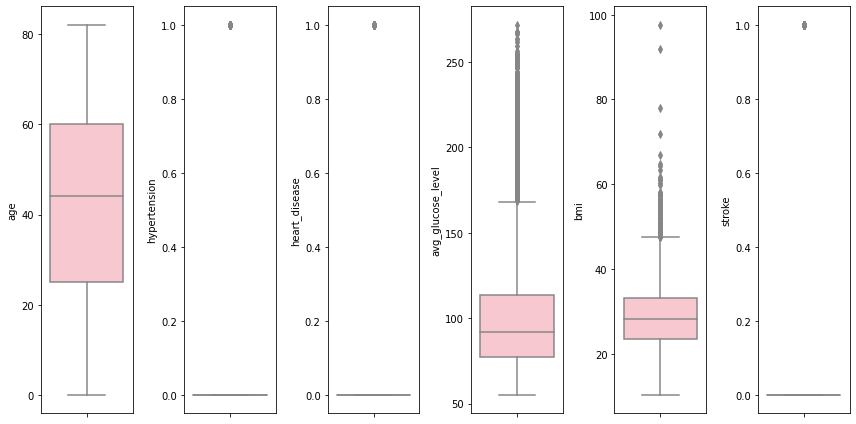

In [16]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='pink')
    plt.tight_layout()

In [ ]:
iqr = (data['avg_glucose_level'].describe()['75%']) - (data['avg_glucose_level'].describe()['25%'])
q3 = data['avg_glucose_level'].describe()['75%']
outlier = q3 + 1.5*iqr

data[data['avg_glucose_level'] >= outlier]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
14,5317,Female,79.0,0,1,Yes,Private,Urban,214.09,28.2,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5061,38009,Male,41.0,0,0,Yes,Private,Urban,223.78,32.3,never smoked,0
5062,11184,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
5063,68967,Male,39.0,0,0,Yes,Private,Urban,179.38,27.7,Unknown,0
5064,66684,Male,70.0,0,0,Yes,Self-employed,Rural,193.88,24.3,Unknown,0


In [17]:
iqr = (data['bmi'].describe()['75%']) - (data['bmi'].describe()['25%'])
q3 = data['bmi'].describe()['75%']
outlier = q3 + 1.5*iqr

data[data['bmi'] >= outlier]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,13861,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
66,17004,Female,70.0,0,0,Yes,Private,Urban,221.58,47.5,never smoked,1
113,41069,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
254,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
258,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4858,1696,Female,43.0,0,0,Yes,Private,Urban,100.88,47.6,smokes,0
4906,72696,Female,53.0,0,0,Yes,Private,Urban,70.51,54.1,never smoked,0
4952,16245,Male,51.0,1,0,Yes,Self-employed,Rural,211.83,56.6,never smoked,0
5009,40732,Female,50.0,0,0,Yes,Self-employed,Rural,126.85,49.5,formerly smoked,0


### KDE plot for knowing the distribution form

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

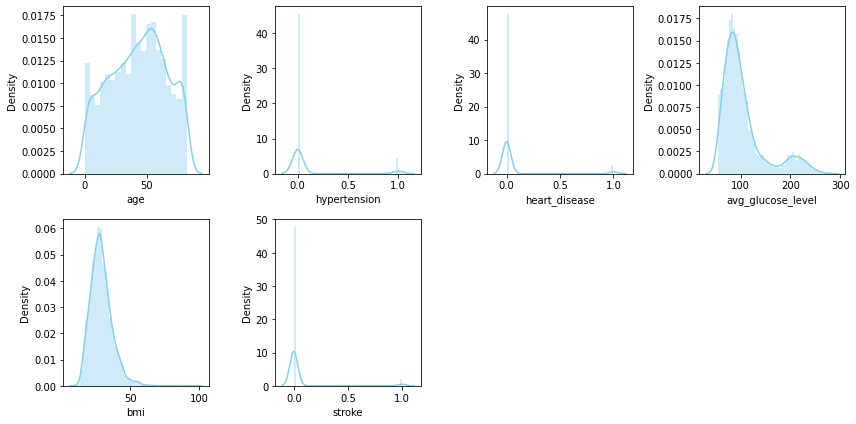

In [18]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=data[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

## Multivariate analysis

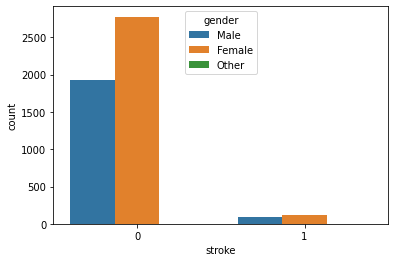

In [19]:
# gender affect stroke?
sns.countplot(data=data,
            x='stroke',
            hue='gender')

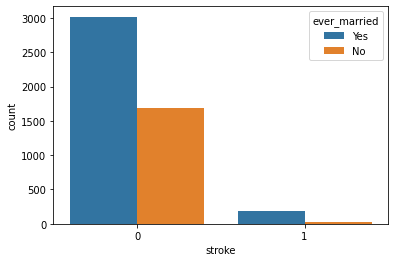

In [20]:
# marriage affect stroke?
sns.countplot(data=data,
            x='stroke',
            hue='ever_married')

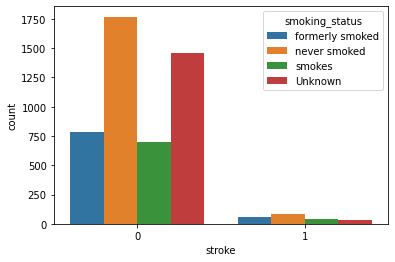

In [21]:
# work type affect stroke?
sns.countplot(data=data,
            x='stroke',
            hue='smoking_status')

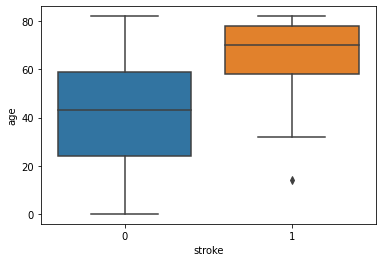

In [22]:
# age affect stroke?
sns.boxplot(x=data['stroke'],
            y=data['age']
           )

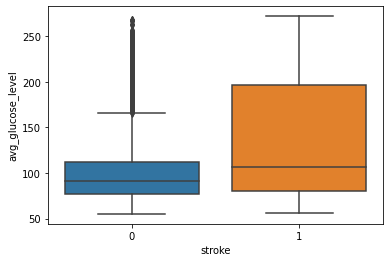

In [23]:
# average glucose level affect stroke?
sns.boxplot(x=data['stroke'],
            y=data['avg_glucose_level']
           )

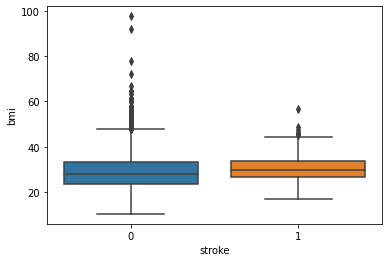

In [24]:
# bmi affect stroke?
sns.boxplot(x=data['stroke'],
            y=data['bmi']
           )

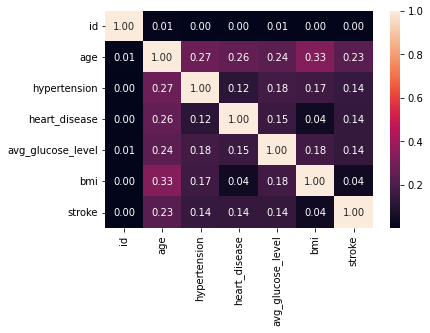

In [25]:
# correlation heatmap
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

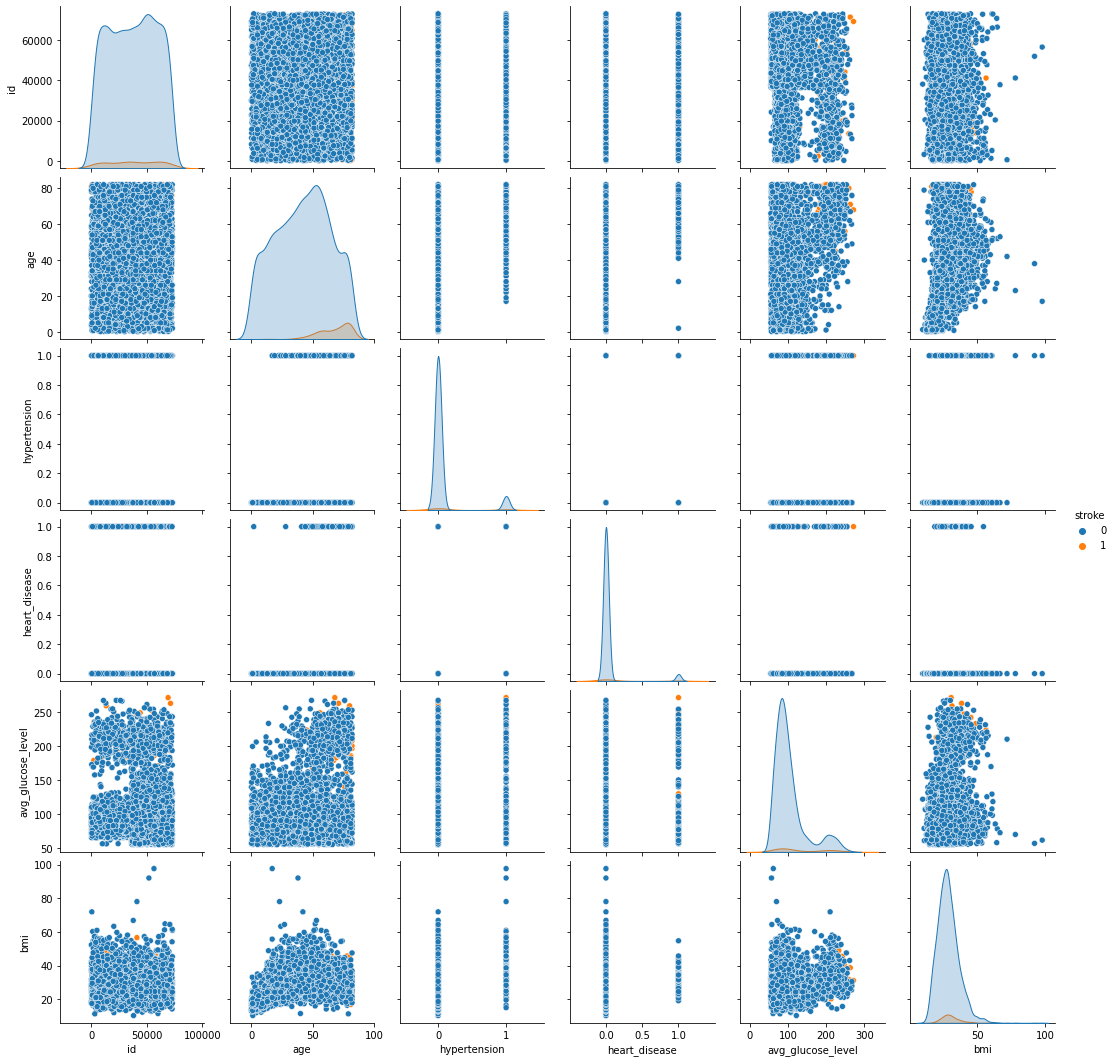

In [26]:
# pairplot of the data
sns.pairplot(data, hue='stroke')

# EDA Conclusion
1. The data does not contain major issues. There are only some NULL values, we've handled them accordingly.
2. Overall, the minimum and maximum values make sense for each column.
3. Most of the columns with continuous numerical values are somewhat symmetric already.
4. From the boxplot we can see outlier in `avg_glucose_level` and `bmi` columns. 
5. In terms of the target variable, `stroke = 1` is less frequent in the dataset.

In [29]:
# export file to spreadsheet 

data.to_excel('stroke_eda.xlsx')
files.download('stroke_eda.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>